In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("seattleWeather_1948-2017.csv")
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [45]:
df.shape

(25551, 5)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [47]:
df['RAIN'].unique()

array([True, False, nan], dtype=object)

In [48]:
df[df['RAIN'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [49]:
df=df.dropna()

In [50]:
df.shape

(25548, 5)

In [51]:
df['RAIN']=df['RAIN'].astype('int')

In [52]:
df['RAIN'].value_counts()

0    14648
1    10900
Name: RAIN, dtype: int64

In [53]:
df=df.drop('DATE',axis=1)

In [54]:
%matplotlib inline

<AxesSubplot:>

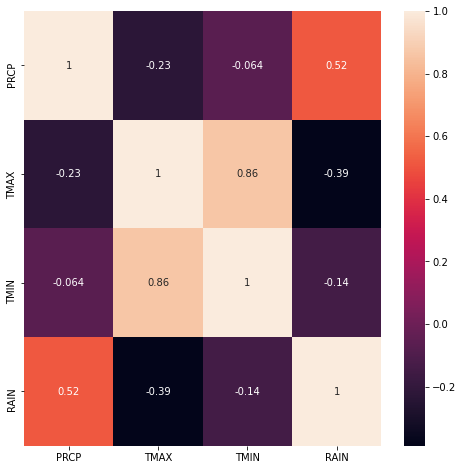

In [55]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(),annot=True)

In [56]:
y=df.pop('RAIN')
X=df

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [59]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [60]:
pred=clf.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[4420    0]
 [   0 3245]]


In [62]:
clf.feature_importances_

array([1., 0., 0.])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0